<a href="https://colab.research.google.com/github/hoon-i/ML-with-Math/blob/main/diabetes_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

In [2]:
#데이터 불러오기

import pandas as pd

df = pd.read_csv('/diabetes_prediction_dataset.csv')

In [3]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
#이상한 부분 -> 성별, 흡연여부

df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [5]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [6]:
# gender -> 라벨인코딩
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,No Info,27.32,6.2,90,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [7]:
#결과확인
df['gender'].value_counts()

gender
0    58552
1    41430
2       18
Name: count, dtype: int64

In [8]:
# smoking -> mapping

smoking_history_mapping = {'never': 0, 'No Info': -1, 'current': 2, 'former': 1, 'ever': 2, 'not current': 0}

df['smoking_history'] = df['smoking_history'].map(smoking_history_mapping)


In [9]:
#결과확인
df['smoking_history'].value_counts()

smoking_history
 0    41542
-1    35816
 2    13290
 1     9352
Name: count, dtype: int64

In [10]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,-1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,-1,27.32,6.2,90,0
99996,0,2.0,0,0,-1,17.37,6.5,100,0
99997,1,66.0,0,0,1,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [11]:
# 각 정보별 특징을 좀 더 자세히
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.414660,41.885856,0.07485,0.039420,0.001160,27.320767,5.527507,138.058060,0.085000
std,0.493031,22.516840,0.26315,0.194593,0.991609,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,-1.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,-1.000000,23.630000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.00000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,2.000000,95.690000,9.000000,300.000000,1.000000


In [12]:
# 각 항목 간 상관 관계
df.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030656,0.014203,0.077696,0.008139,-0.022994,0.019957,0.017199,0.037411
age,-0.030656,1.000000,0.251171,0.233354,0.241594,0.337396,0.101354,0.110672,0.258008
hypertension,0.014203,0.251171,1.000000,0.121262,0.100802,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233354,0.121262,1.000000,0.073820,0.061198,0.067589,0.070066,0.171727
smoking_history,0.008139,0.241594,0.100802,0.073820,1.000000,0.189214,0.040588,0.046678,0.107259
bmi,-0.022994,0.337396,0.147666,0.061198,0.189214,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.019957,0.101354,0.080939,0.067589,0.040588,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,0.046678,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.258008,0.197823,0.171727,0.107259,0.214357,0.400660,0.419558,1.000000


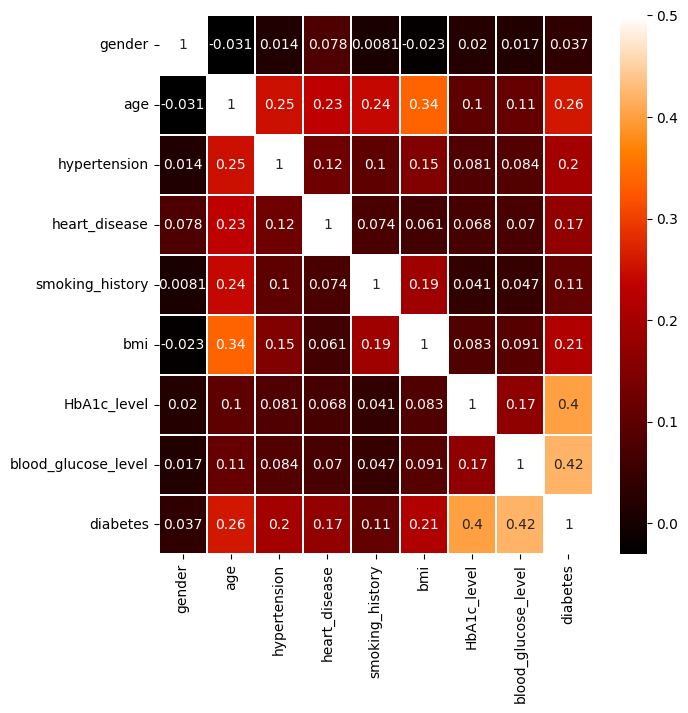

In [13]:
# 상관관계 히트맵 시각화
import matplotlib.pyplot as plt
import seaborn as sns

colormap = plt.cm.gist_heat   #그래프의 색상 구성을 정합니다.

plt.figure(figsize=(7,7))   #그래프의 크기를 정합니다.

sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)

plt.show()

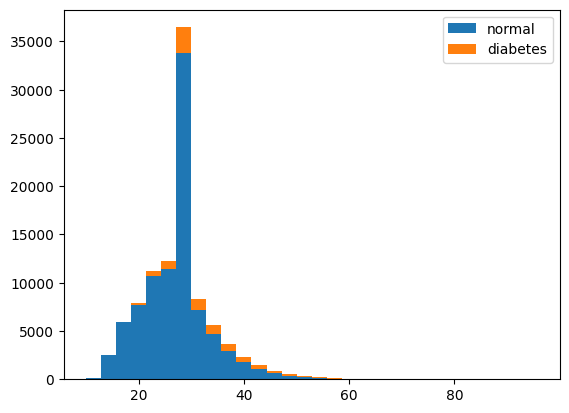

In [14]:
#BMI를 기준으로 각각 정상과 당뇨의 분포 확인
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.legend()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


In [16]:
#나이 int로 변환
df['age'] = df['age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  int64  
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 6.9 MB


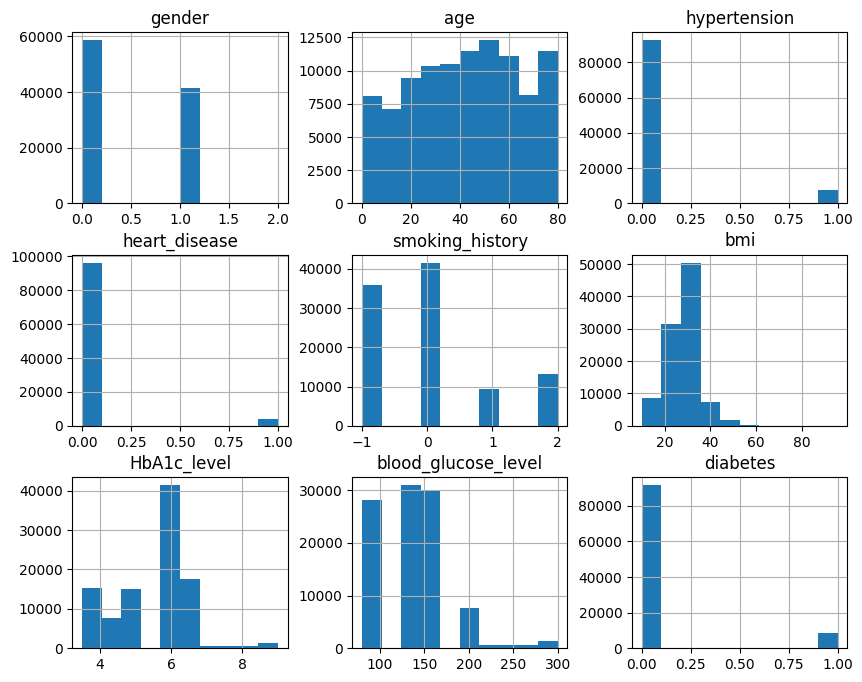

In [17]:
df.hist(bins=10, figsize=(10,8))
plt.show()

In [18]:
#데이터 나누기
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [19]:
#feature scaleing

stand = preprocessing.StandardScaler()
X_train = stand.fit_transform(X_train)
X_test = stand.transform(X_test)


In [20]:
#ann 모델 설정 + early stopping
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann = tf.keras.models.Sequential() #ann 모델 불러오기

#layer 설정 및 활성함수 설정
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

#최적화 및 loss함수 설정
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#early stop
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
deep_history = ann.fit(X_train, y_train, epochs=100,
                              validation_data = (X_test, y_test),
                              callbacks=[early_stop])



Epoch 1/100
2500/2500 [==============================] - 14s 5ms/step - loss: 0.1800 - accuracy: 0.9377 - val_loss: 0.1191 - val_accuracy: 0.9574
Epoch 2/100
2500/2500 [==============================] - 10s 4ms/step - loss: 0.1162 - accuracy: 0.9597 - val_loss: 0.1162 - val_accuracy: 0.9596
Epoch 3/100
2500/2500 [==============================] - 8s 3ms/step - loss: 0.1143 - accuracy: 0.9603 - val_loss: 0.1162 - val_accuracy: 0.9603
Epoch 4/100
2500/2500 [==============================] - 9s 4ms/step - loss: 0.1131 - accuracy: 0.9609 - val_loss: 0.1151 - val_accuracy: 0.9611
Epoch 5/100
2500/2500 [==============================] - 8s 3ms/step - loss: 0.1123 - accuracy: 0.9614 - val_loss: 0.1138 - val_accuracy: 0.9606
Epoch 6/100
2500/2500 [==============================] - 9s 4ms/step - loss: 0.1114 - accuracy: 0.9617 - val_loss: 0.1131 - val_accuracy: 0.9616
Epoch 7/100
2500/2500 [==============================] - 8s 3ms/step - loss: 0.1105 - accuracy: 0.9621 - val_loss: 0.1122 - val_

In [21]:
# 테스트 결과를 출력합니다.
score=ann.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

625/625 [==============================] - 1s 2ms/step - loss: 0.0946 - accuracy: 0.9672
Test accuracy: 0.967199981212616


In [25]:
# 그래프 확인

hist_df=pd.DataFrame(deep_history.history)

hist_df


,loss,accuracy,val_loss,val_accuracy
0,0.179979,0.937675,0.119108,0.95735
1,0.116240,0.959662,0.116233,0.95955
2,0.114278,0.960262,0.116157,0.96025
3,0.113127,0.960875,0.115072,0.96110
4,0.112341,0.961375,0.113789,0.96055
5,0.111423,0.961712,0.113134,0.96160
6,0.110479,0.962150,0.112158,0.96155
7,0.110001,0.962525,0.111691,0.96165
8,0.109475,0.962725,0.111265,0.96220
9,0.109029,0.962687,0.110754,0.96195


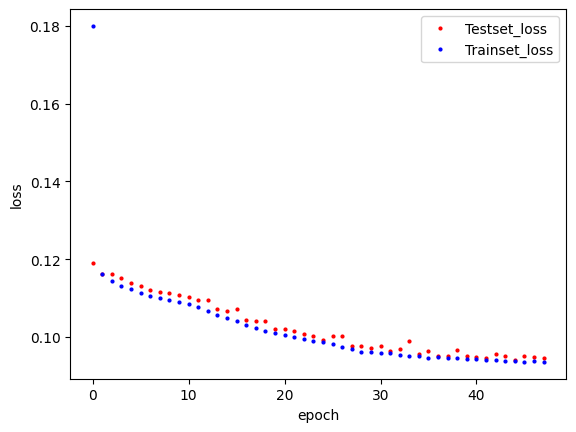

In [29]:
# y_vloss -> 테스트셋(여기서는 검증셋)의 오차
y_vloss=hist_df['val_loss']

# y_loss -> 학습셋의 오차.
y_loss=hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

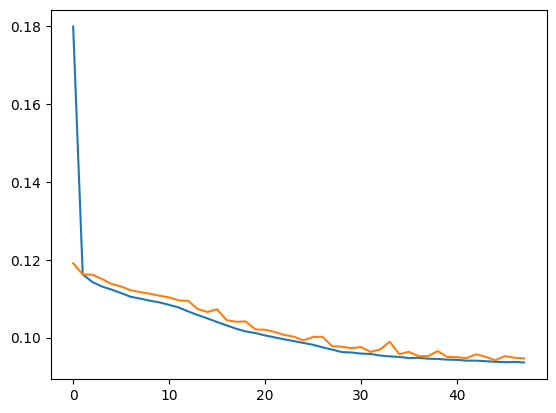

In [30]:

x_len = np.arange(len(y_loss))

plt.plot(x_len,y_loss,y_vloss)

In [38]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,0,25.19,6.6,140,0
1,0,54,0,0,-1,27.32,6.6,80,0
2,1,28,0,0,0,27.32,5.7,158,0
3,0,36,0,0,2,23.45,5.0,155,0
4,1,76,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80,0,0,-1,27.32,6.2,90,0
99996,0,2,0,0,-1,17.37,6.5,100,0
99997,1,66,0,0,1,27.83,5.7,155,0
99998,0,24,0,0,0,35.42,4.0,100,0


In [48]:
X = df.drop('diabetes', axis=1)  # 'diabetes' 열이 타겟 변수입니다.
y = df['diabetes']

# 몇 겹으로 나눌 것인지를 정합니다.
k = 5

# KFold 함수를 불러옵니다. 분할하기 전에 샘플이 치우치지 않도록 섞어 줍니다.
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# 정확도가 채워질 빈 리스트를 준비합니다.
acc_score = []

def model_fn(input_dim):
    model = Sequential()  # 딥러닝 모델의 구조를 시작합니다.
    model.add(Dense(24, input_dim=input_dim, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# K겹 교차 검증을 이용해 k번의 학습을 실행합니다.
for train_index, test_index in kfold.split(X):  # for문에 의해서 k번 반복합니다. split()에 의해 k개의 학습셋, 테스트셋으로 분리됩니다.
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = model_fn(X_train.shape[1])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=20, verbose=0)

    accuracy = model.evaluate(X_test, y_test)[1]  # 정확도를 구합니다.
    acc_score.append(accuracy)  # 정확도 리스트에 저장합니다.

# k번 실시된 정확도의 평균을 구합니다.
avg_acc_score = sum(acc_score) / k

# 결과를 출력합니다.
print('정확도:', acc_score)
print('정확도 평균:', avg_acc_score)

625/625 [==============================] - 1s 2ms/step - loss: 0.1058 - accuracy: 0.9622
정확도: [0.9643499851226807, 0.9692500233650208, 0.9646000266075134, 0.9681000113487244, 0.9621999859809875]
정확도 평균: 0.9657000064849853


In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import Dropout

layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

In [64]:
model = keras.models.Sequential([
    Dense(300, activation="elu", kernel_initializer="he_normal", kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(100, activation="elu", kernel_initializer="he_normal", kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(10, activation="softmax", kernel_regularizer=l2(0.01))
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_test, y_test))

Epoch 1/2
2500/2500 [==============================] - 13s 4ms/step - loss: 4.0391 - accuracy: 0.8907 - val_loss: 1.5229 - val_accuracy: 0.9153
Epoch 2/2
2500/2500 [==============================] - 11s 4ms/step - loss: 0.9756 - accuracy: 0.9161 - val_loss: 0.5519 - val_accuracy: 0.9153


In [66]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = Sequential([
    RegularizedDense(300, input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    RegularizedDense(100),
    Dropout(0.3),
    RegularizedDense(1, activation="sigmoid")  # 이진 분류를 위한 sigmoid 출력
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_test, y_test))

Epoch 1/2
2500/2500 [==============================] - 119s 4ms/step - loss: nan - accuracy: 0.9147 - val_loss: nan - val_accuracy: 0.9153
Epoch 2/2
2500/2500 [==============================] - 9s 4ms/step - loss: nan - accuracy: 0.9149 - val_loss: nan - val_accuracy: 0.9153


In [68]:
#드롭아웃

model = Sequential([
    Dropout(rate=0.2, input_shape=(X_train.shape[1],)),
    Dense(300, activation="elu", kernel_initializer="he_normal"),
    Dropout(rate=0.2),
    Dense(100, activation="elu", kernel_initializer="he_normal"),
    Dropout(rate=0.2),
    Dense(1, activation="sigmoid")  # 이진 분류를 위한 sigmoid 출력
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_test, y_test))

Epoch 1/2
2500/2500 [==============================] - 12s 4ms/step - loss: nan - accuracy: 0.9146 - val_loss: nan - val_accuracy: 0.9153
Epoch 2/2
2500/2500 [==============================] - 9s 4ms/step - loss: nan - accuracy: 0.9149 - val_loss: nan - val_accuracy: 0.9153
